In [189]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import csv
from pandas import *

In [190]:
df = read_csv('privacytest.csv', skiprows=1)
df.head()

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,...,Q1.1,Q1_5_TEXT,Q2.1,Q3,Q4,Q103,Q5,Q108,Q108_8_TEXT,Q121
0,5/15/2023 10:48,5/15/2023 10:55,IP Address,100,412,True,5/15/2023 10:55,R_2CcSOc053PbiX8l,anonymous,EN,...,Man,NaN,31-40,White,High school graduate (high school diploma or e...,Do you have serious difficulty walking or clim...,"Less than $10,000",Single,NaN,A11F3MA5FWH6SJ
1,5/15/2023 10:45,5/15/2023 10:58,IP Address,100,754,True,5/15/2023 10:58,R_3MGKrvbidxRYCt5,anonymous,EN,...,Man,NaN,31-40,White,High school graduate (high school diploma or e...,NaN,"$150,000 to under $200,000",Single,NaN,A2KRPK3GQR0GA9
2,5/15/2023 10:59,5/15/2023 11:29,IP Address,100,1773,True,5/15/2023 11:29,R_3I6v7B9RbHqWbct,anonymous,EN,...,Man,NaN,41-50,White,Bachelor's degree,Do you have difficulty dressing or bathing?,"$80,000 to under $100,000",Married,NaN,ATHFYU89LSLV0
3,5/15/2023 10:48,5/15/2023 11:32,IP Address,100,2639,True,5/15/2023 11:32,R_1fjz7vqFOPgEEJ3,anonymous,EN,...,Man,NaN,31-40,White,Bachelor's degree,Do you have difficulty dressing or bathing?,"$30,000 to under $40,000",Married,NaN,A2OANRHST2SYTR
4,5/15/2023 11:53,5/15/2023 12:02,IP Address,100,528,True,5/15/2023 12:02,R_DN2HnFXcAdXBGox,anonymous,EN,...,Man,NaN,31-40,White,Associate's degree,"Because of a physical, mental, or emotional c...","$30,000 to under $40,000",Married,NaN,A1FQ31IUKT2BPR


In [191]:
birthdate = df['Q75_1']
under13 = df['Q78_1']

#child = concat([birthdate, under13],axis=1)
df['Average_child'] = (birthdate + under13) / 2
child= df['Average'] 
#print(child)


KeyError: 'Average'

In [ ]:
outsidePurchase = df['Q80_1']
targetedAds = df['Q84_1']

#thirdparties = concat([outsidePurchase, targetedAds],axis=1)
df['Average_thirdparties'] = (outsidePurchase + targetedAds) / 2
thirdparties= df['Average_thirdparties']


In [ ]:
gameRecs = df['Q87_1']
orderRecs = df['Q88_1']
friendRecs = df['Q89_1']

df['Average_datatracking'] = (gameRecs + orderRecs+friendRecs) / 3
#datatracking = concat([gameRecs, orderRecs, friendRecs],axis=1)
datatracking=df['Average_datatracking']

In [ ]:
eyePhoto = df['Q133_1']
handPhoto = df['Q94_1']
facePhoto = df['Q132_1']

photos = concat([eyePhoto, handPhoto, facePhoto])


In [ ]:
eyeData = df['Q94_1']
handData = df['Q131_1']
faceData = df['Q95_1']

#data = concat([eyeData, handData,faceData])
df['Average_data'] = (eyeData + handData+faceData) / 3
data=df['Average_data']

In [ ]:

voice_moderation = df['Q69_1']
voice_buisness = df['Q71_1']

#voice = concat([voice_moderation, voice_buisness])
df['Average_voice'] = (voice_buisness + voice_moderation) / 2
voice = df['Average_voice']
df['biometric']= (voice + data) / 2
biometric = df['biometric']


0   -83.333333
1    11.916667
2    30.333333
3    79.416667
4    68.000000
Name: biometric, dtype: float64

Text(0.5, 0, 'User Trust')

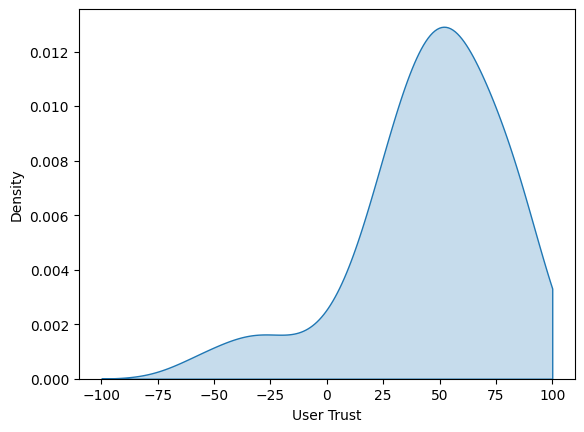

In [ ]:
sns.kdeplot(data=child,fill=True,clip=(-100, 100))
plt.xlabel('User Trust')


Text(0.5, 0, 'User Trust')

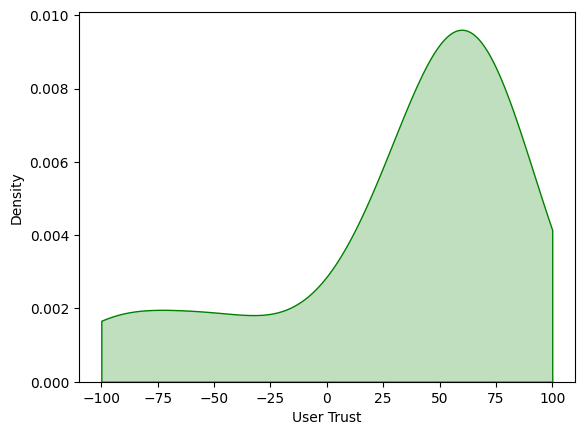

In [ ]:
sns.kdeplot(thirdparties, color = "g",fill=True,clip=(-100, 100))
plt.xlabel('User Trust')


<Axes: xlabel='Average_datatracking', ylabel='Density'>

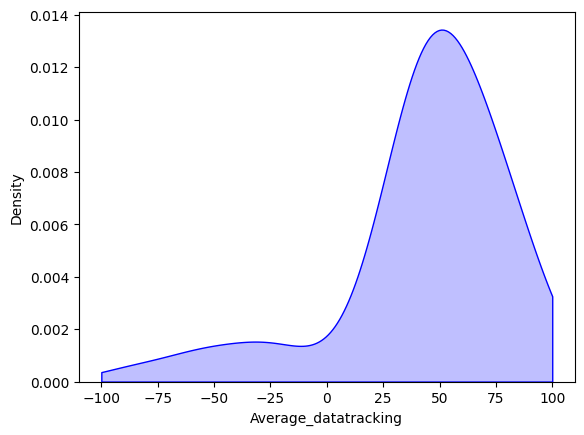

In [ ]:
sns.kdeplot(datatracking, fill=True, color = "b", clip=(-100, 100))
plt.xlabel('User Trust')


Text(0.5, 0, 'User Trust')

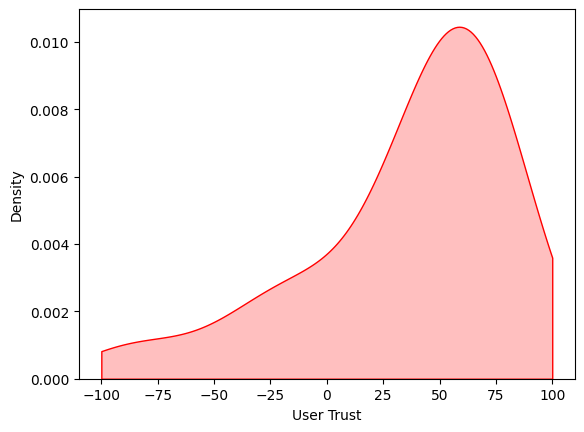

In [ ]:
sns.kdeplot(biometric, color = "r", fill=True, clip=(-100, 100))
plt.xlabel('User Trust')


In [192]:
# sns.kdeplot(thirdparties, color = "g", label = "Third Parties")
# sns.kdeplot(datatracking, color = "b", label = "Data Tracking")
#sns.kdeplot(child, color = "y", label = "Child Safety")
# sns.kdeplot(biometric, color = "r", label = "Biometric Data")
# plt.xlabel('User Trust')
# plt.show()